In [2]:
from bayes_opt import BayesianOptimization
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import cv2
from PIL import Image
from tensorflow import keras
from glob import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import imutils
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import argparse

In [23]:
def calculate_width(file_dir):
    image = cv2.imread(file_dir)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)

    edged = cv2.Canny(gray, 7, 15)
    edged = cv2.dilate(edged, None, iterations=4)
    edged = cv2.erode(edged, None, iterations=1)

    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    (cnts, _) = contours.sort_contours(cnts)
    pixelsPerMetric = None
    
    mask = np.zeros(image.shape[:2], dtype=image.dtype)
    for c in cnts:
        if cv2.contourArea(c) > 100000:
            x, y, w, h = cv2.boundingRect(c)
            cv2.drawContours(mask, [c], 0, (255), -1)
    result = cv2.bitwise_and(image,image, mask= mask)
    grayScaledImage = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    ret, processedImage = cv2.threshold(grayScaledImage, 10, 255, cv2.THRESH_BINARY)
    
    # 너무 오래걸려서 다음에할땐 processed image resize 한번 해줘야할듯
    
    h, w = processedImage.shape
    
    total_counts = []
    
    for i in range(w):
        
        count = 0
        for j in range(h):
            if processedImage[j][i] != 0:
                count += 1
    
        if count != 0:
            total_counts.append(count)
    line_pixel_width = np.mean(total_counts)
    #print(line_pixel_width)
    return line_pixel_width

In [35]:
mother_dir = "PEDOTPSS_electrodes"
def calculate_width_from_mother_dir(target):
    for file in os.listdir(mother_dir):
        if file[:-4].split(",")[:3] == target and file[:-4].split(",")[-1].replace(" ","") == "200x":
            return calculate_width(mother_dir + "/" + file)
    return 0
    

In [36]:
# 200x 배율 이미지에서 계산된 높이값으로 1000x 배율 impedance 값 조정

origin_dir = "040323 pedot 1000x"
make_dir = "PEDOTPSS_electrodes1000x"
pixel_conv = 0.001

os.makedirs(make_dir)

count = 1

for file in os.listdir(origin_dir):
    
    
    width = calculate_width_from_mother_dir(file[:-4].split(",")[:3])
    
    print("width", count," : ", width)
    new_imp = float(file[:-4].split(",")[3].replace(" ","")) * width * pixel_conv
    print("original impedance : ", file[:-4].split(",")[3].replace(" ",""))
    print("new impedance : ", new_imp)
    
    im = load_img(origin_dir + "/" + file)
    cropped_img = im.crop((0,704,2560,1216))
    cropped_img.save(make_dir + "/" + str(new_imp) + ".jpg")
    print("----------image saved----------")
    count += 1

width 1  :  499.90859375
original impedance :  1517.79616
new impedance :  758.7593439447501
----------image saved----------
width 2  :  507.039453125
original impedance :  1606.8128866
new impedance :  814.7175272958666
----------image saved----------
width 3  :  392.3598277212216
original impedance :  1753.8167436
new impedance :  688.12723537349
----------image saved----------
width 4  :  417.598828125
original impedance :  2094.137776
new impedance :  874.5094811898938
----------image saved----------
width 5  :  306.61875
original impedance :  4832.925756
new impedance :  1481.865654147525
----------image saved----------
width 6  :  301.686328125
original impedance :  4198.37313
new impedance :  1266.5917736883632
----------image saved----------
width 7  :  311.983984375
original impedance :  3427.486384
new impedance :  1069.3208584713811
----------image saved----------
width 8  :  314.83984375
original impedance :  4161.18777
new impedance :  1310.1077073212107
----------image sa

width 66  :  363.23335943617855
original impedance :  2717.575922
new impedance :  987.1142316709303
----------image saved----------
width 67  :  393.163671875
original impedance :  2933.080306
new impedance :  1153.1806230112084
----------image saved----------
width 68  :  267.36842105263156
original impedance :  3507.73807
new impedance :  937.8583892421052
----------image saved----------
width 69  :  311.39162561576353
original impedance :  3495.354674
new impedance :  1088.4241740405173
----------image saved----------
width 70  :  407.14609375
original impedance :  3328.25774
new impedance :  1355.087137834203
----------image saved----------
width 71  :  413.93515625
original impedance :  2704.445974
new impedance :  1119.4652668173735
----------image saved----------
width 72  :  307.0015625
original impedance :  5224.878782
new impedance :  1604.0459499470967
----------image saved----------
width 73  :  298.701953125
original impedance :  4345.181194
new impedance :  1297.91410932

width 131  :  482.23515625
original impedance :  1899.4254238
new impedance :  915.9697160314155
----------image saved----------
width 132  :  480.360546875
original impedance :  1998.1816546
new impedance :  959.8476323592483
----------image saved----------
width 133  :  472.19375
original impedance :  1845.069513
new impedance :  871.2302923541438
----------image saved----------
width 134  :  468.143359375
original impedance :  1880.6890844
new impedance :  880.432105910909
----------image saved----------
width 135  :  384.337890625
original impedance :  2731.468014
new impedance :  1049.806654810418
----------image saved----------
width 136  :  398.96640625
original impedance :  2457.213766
new impedance :  980.3457456090483
----------image saved----------
width 137  :  407.4640625
original impedance :  2650.224672
new impedance :  1079.87131139085
----------image saved----------
width 138  :  412.041015625
original impedance :  2559.07955
new impedance :  1054.4457368471678
-------

In [25]:
# 이미지 쪼개기

directory = "PEDOTPSS_electrodes1000x"

image_width = 512
image_height = 512
rows = 1
columns = 5

X = []
Y = []

for file_name in os.listdir(directory):
    if file_name != '.DS_Store':
        image = Image.open(directory+"/"+file_name).convert("L")
        for j in range(rows):

            for i in range(columns):
                cropped = image.crop((i*image_width,j*image_height,(i+1)*image_width,(j+1)*image_height))
                cropped = np.array(cropped)
                X.append(cropped)
                Y.append(int(float(file_name[:-4])))
        

In [26]:
X = np.array(X)/255.0
Y = np.array(Y)
print(X.shape, Y.shape)

(870, 512, 512) (870,)


In [27]:
Y = 1/Y

In [28]:
# 2. standard_scaler 사용
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
standard_scaler_y = StandardScaler()
reshape_y = Y.reshape(-1,1)
reshape_y = standard_scaler_y.fit_transform(reshape_y)
print(Y.shape, reshape_y.shape)

(870,) (870, 1)


In [29]:
from sklearn.model_selection import train_test_split

test_size = 0.2
shuffle = True
random_state = 42

train_x, test_x, train_y, test_y = train_test_split(X, reshape_y, test_size=test_size, shuffle=shuffle, random_state=random_state)

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# checkpoint_cb = ModelCheckpoint("saved_model.h5", save_best_only=True)

patience=10
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')

In [31]:
train_x_cnn = train_x[..., np.newaxis]
test_x_cnn = test_x[..., np.newaxis]

In [32]:
train_x_cnn.shape

(696, 512, 512, 1)

In [33]:
train_y.shape

(696, 1)

In [34]:
# callback
patience=30
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')

# sequential model
cnn_model = keras.models.Sequential()

# input and convolutional layer
cnn_model.add(keras.layers.Conv2D(32, 7, activation='relu', padding='same',
                                  input_shape=[512, 512, 1]))
# pooling layer
cnn_model.add(keras.layers.MaxPooling2D(2))

# convolutional layers and pooling layer
cnn_model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
cnn_model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
cnn_model.add(keras.layers.MaxPooling2D(2))

# convolutional layers and pooling layer
cnn_model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
cnn_model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
cnn_model.add(keras.layers.MaxPooling2D(2))

# flatten layer
cnn_model.add(keras.layers.Flatten())

# dense layers
cnn_model.add(keras.layers.Dense(64, activation='relu'))
cnn_model.add(keras.layers.Dense(32, activation='relu'))

# output layer
cnn_model.add(keras.layers.Dense(1))

# model complie
cnn_model.compile(optimizer='adam',loss='mse')

In [35]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 512, 512, 32)      1600      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 256, 256, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 128)    

In [36]:
path_directory = "cnn_model_zoom1000_512x512_4.h5"
istrue = os.path.exists(path_directory)

if not istrue:
    history = cnn_model.fit(train_x_cnn, train_y, callbacks=[early_stopping_cb],
                            epochs=100, validation_split=0.2)
    cnn_model.save(path_directory)
    print("model is saved")
else:
    cnn_model = keras.models.load_model(path_directory)
    print("model is loaded")

Epoch 1/100
18/18 [==============================] - 10s 306ms/step - loss: 2.1695 - val_loss: 1.1000
Epoch 2/100
18/18 [==============================] - 3s 187ms/step - loss: 0.9716 - val_loss: 1.1023
Epoch 3/100
18/18 [==============================] - 3s 191ms/step - loss: 0.9794 - val_loss: 1.0925
Epoch 4/100
18/18 [==============================] - 3s 185ms/step - loss: 1.0592 - val_loss: 1.0967
Epoch 5/100
18/18 [==============================] - 3s 188ms/step - loss: 0.9464 - val_loss: 0.9759
Epoch 6/100
18/18 [==============================] - 3s 184ms/step - loss: 0.8480 - val_loss: 1.3746
Epoch 7/100
18/18 [==============================] - 3s 184ms/step - loss: 0.9614 - val_loss: 1.0760
Epoch 8/100
18/18 [==============================] - 3s 187ms/step - loss: 0.8745 - val_loss: 0.8439
Epoch 9/100
18/18 [==============================] - 3s 184ms/step - loss: 0.9087 - val_loss: 1.0139
Epoch 10/100
18/18 [==============================] - 3s 184ms/step - loss: 0.8766 - val_l

In [106]:
print(cnn_model.evaluate(train_x_cnn, train_y))

5/5 [==============================] - 1s 152ms/step - loss: 0.0943
0.09428410977125168


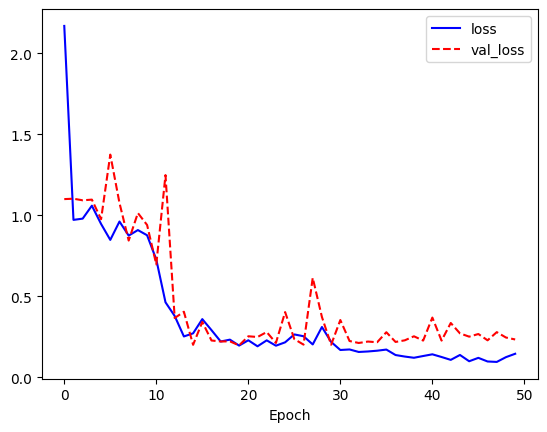

In [37]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error

pred = cnn_model.predict(test_x)

print("MSE: %.4f" % mean_squared_error(test_y, pred))

6/6 [==============================] - 1s 229ms/step
MSE: 0.2288


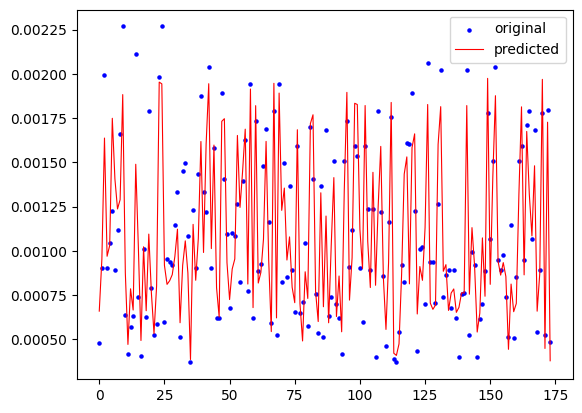

In [41]:
inv_test_y = standard_scaler_y.inverse_transform(test_y)
inv_pred = standard_scaler_y.inverse_transform(pred)

x_ax = range(len(inv_pred))
plt.scatter(x_ax, inv_test_y, s=5, color="blue", label="original")
plt.plot(x_ax, inv_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

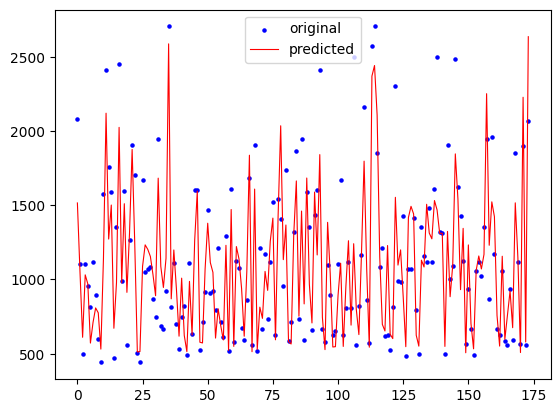

In [47]:
inv_test_y = standard_scaler_y.inverse_transform(test_y)
inv_pred = standard_scaler_y.inverse_transform(pred)

inv_test_y = 1/inv_test_y
inv_pred = 1/inv_pred

x_ax = range(len(inv_pred))
plt.scatter(x_ax, inv_test_y, s=5, color="blue", label="original")
plt.plot(x_ax, inv_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

print("MSE: %.4f" % mean_squared_error(inv_test_y, inv_pred))

MSE: 77944.4979


In [49]:
import psutil
import os

print("=="*20)
print("== memory usage check")

for exec_num in range(0, 2):
    # BEFORE code
    print(f"== {exec_num:2d} exec")
    # general RAM usage
    memory_usage_dict = dict(psutil.virtual_memory()._asdict())
    memory_usage_percent = memory_usage_dict['percent']
    print(f"BEFORE CODE: memory_usage_percent: {memory_usage_percent}%")
    # current process RAM usage
    pid = os.getpid()
    current_process = psutil.Process(pid)
    current_process_memory_usage_as_KB = current_process.memory_info()[0] / 2.**20
    print(f"BEFORE CODE: Current memory KB   : {current_process_memory_usage_as_KB: 9.3f} KB")

    X = [i for i in range(0, 9000000)]
    # AFTER  code
    memory_usage_dict = dict(psutil.virtual_memory()._asdict())
    memory_usage_percent = memory_usage_dict['percent']
    print(f"AFTER  CODE: memory_usage_percent: {memory_usage_percent}%")
    # current process RAM usage
    pid = os.getpid()
    current_process = psutil.Process(pid)
    current_process_memory_usage_as_KB = current_process.memory_info()[0] / 2.**20
    print(f"AFTER  CODE: Current memory KB   : {current_process_memory_usage_as_KB: 9.3f} KB")
    del X
    print("--"*30)

== memory usage check
==  0 exec
BEFORE CODE: memory_usage_percent: 35.7%
BEFORE CODE: Current memory KB   :  5285.285 KB
AFTER  CODE: memory_usage_percent: 36.8%
AFTER  CODE: Current memory KB   :  5634.848 KB
------------------------------------------------------------
==  1 exec
BEFORE CODE: memory_usage_percent: 35.7%
BEFORE CODE: Current memory KB   :  5287.559 KB
AFTER  CODE: memory_usage_percent: 36.8%
AFTER  CODE: Current memory KB   :  5635.465 KB
------------------------------------------------------------


In [1]:
echo "# jaccard_agglomerativeclustering" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/hguhcbuf/jaccard_agglomerativeclustering.git
git push -u origin main

SyntaxError: invalid syntax (3081700216.py, line 1)